#데이터 셋 불러오기

In [ ]:
!pip install d2l

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 82 kB 613 kB/s 
     |████████████████████████████████| 9.9 MB 23.9 MB/s 
     |████████████████████████████████| 11.2 MB 30.8 MB/s 
     |████████████████████████████████| 61 kB 5.3 MB/s 
     |████████████████████████████████| 15.7 MB 25.8 MB/s 
     |████████████████████████████████| 944 kB 58.1 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    

In [ ]:
import d2l

In [ ]:
#라이브러리
%matplotlib inline
import torch
import torchvision
from torch.utils import data
from torchvision import transforms
from d2l import torch as d2l

d2l.use_svg_display()

https://wikidocs.net/60324
https://tutorials.pytorch.kr/beginner/basics/data_tutorial.html

토치 비전(torchvision): 데이터셋, 모델 및 이미지 전처리 도구 등을 포함하는 패키지

In [ ]:
#GPU
USE_CUDA = torch.cuda.is_available() #gpu 사용 가능하면 true, 아니면 false
device = torch.device("cuda" if USE_CUDA else "cpu") #gpu 가능하면 쓰고 아님 cpu 쓰기

사용 데이터 셋:MNIST
http://yann.lecun.com/exdb/mnist/

In [ ]:
trans = transforms.ToTensor() #ToTensor: PIL image파일 -> tensor

trainset = torchvision.datasets.MNIST(
    root = "../data",
    train = True,
    transform = trans,
    download = True)

testset = torchvision.datasets.MNIST(
    root = "../data",
    train = False,
    transform = trans,
    download = True)

#root : train/test 데이터가 저장되는 경로
#train: train/test 여부 결정
#download=True: root 경로에 데이터가 없는 경우, 서버에서 다운로드
# transform: feature와 label의 변형을 저장

In [ ]:
len(trainset), len(testset)

(60000, 10000)

In [ ]:
trainset[0][0].shape
#28x28 픽셀 크기에 1개의 채널(흑백)

torch.Size([1, 28, 28])

##시각화

In [ ]:
#이미지와 레이블 그리기
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):
  figsize = (num_cols * scale, num_rows * scale)
  _, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize)
  axes = axes.flatten()
  for i, (ax, img) in enumerate(zip(axes, imgs)):
    if torch.is_tensor(img):
            # Tensor Image
      ax.imshow(img.numpy())
    else:
# PIL Image
        ax.imshow(img)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    if titles:
        ax.set_title(titles[i])
  return axes

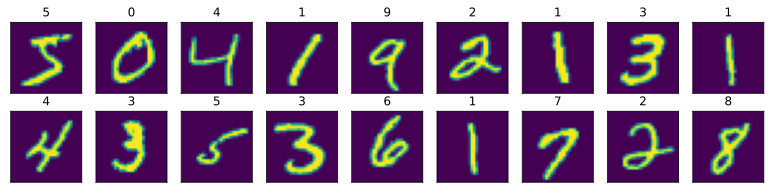

In [ ]:
X, y = next(iter(data.DataLoader(trainset, batch_size=18)))
show_images(X.reshape(18, 28, 28), 2, 9, titles= y.tolist());

In [ ]:
!pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 8.3 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.1
    Uninstalling matplotlib-3.5.1:
      Successfully uninstalled matplotlib-3.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
d2l 0.17.5 requires matplotlib==3.5.1, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


##미니 배치 읽기

In [ ]:
!pip install mxnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 49.1 MB 128 kB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [ ]:
batch_size = 256

def get_dataloader_workers():
  return 4

train_iter = data.DataLoader(trainset, batch_size, shuffle = True, num_workers = get_dataloader_workers())

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
timer = d2l.Timer()
for X, y in train_iter:
    continue
f'{timer.stop():.2f} sec'

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


'6.29 sec'

In [ ]:
def load_data_mnist(batch_size, resize=None):  
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize))
    trans = transforms.Compose(trans)
    trainset = torchvision.datasets.MNIST(
        root="../data", train=True, transform=trans, download=True)
    testset = torchvision.datasets.MNIST(
        root="../data", train=False, transform=trans, download=True)
    return (data.DataLoader(trainset, batch_size, shuffle=True,
                            num_workers=get_dataloader_workers()),
            data.DataLoader(testset, batch_size, shuffle=False,
                            num_workers=get_dataloader_workers()))

In [ ]:
train_iter, test_iter = load_data_mnist(256, resize = 28)
for X, y in train_iter:
  print(X.shape, X.dtype, y.shape, y.dtype)
  break

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


torch.Size([256, 1, 28, 28]) torch.float32 torch.Size([256]) torch.int64


##Softmax

In [ ]:
from IPython import display

batch_size = 256
train_iter, test_iter = load_data_mnist(batch_size)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
num_inputs = 784 # 28 x 28
num_outputs = 10 #label 개수

W = torch.normal(0, 0.01, size = (num_inputs, num_outputs), requires_grad = True) #requires_grad = True: 자동미분한 결과값 저장
b = torch.zeros(num_outputs, requires_grad = True)

In [ ]:
X = torch.tensor([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
X.sum(0, keepdim=True) #0: 행 기준 더하기 #keepdim
X.sum(1, keepdim=True) #1: 열 기준 더하기

tensor([[ 6.],
        [15.]])

In [ ]:
#softmax 함수: 지수값 구하기, 정규화 상수를 위해 모두 더해줌 -> 각 행을 정규화 상수로 나눠줌
def softmax(X):
    X_exp = torch.exp(X)
    partition = X_exp.sum(1, keepdim=True) #keepdim으로 차원 수를 줄이지 않고 유지할 수도 있다
    return X_exp / partition

In [ ]:
X = torch.normal(0, 1, (2,5))
X_prob =softmax(X) #softmax 함수에 넣으면 확률값으로 나옴!
X_prob, X_prob.sum(1) #확률이니까 더하면 1이 된답니다

(tensor([[0.3094, 0.0793, 0.4118, 0.1231, 0.0764],
         [0.2224, 0.2073, 0.4447, 0.0564, 0.0692]]), tensor([1.0000, 1.0000]))

In [ ]:
#모델 만들기
def net(X):
  return softmax(torch.matmul(X.reshape((-1, W.shape[0])), W)+ b)

In [ ]:
#loss function
y = torch.tensor([0, 2])
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
y_hat[[0, 1], y]

tensor([0.1000, 0.5000])

In [ ]:
#cross-entropy
def cross_entropy(y_hat, y):
    return - torch.log(y_hat[range(len(y_hat)), y])
cross_entropy(y_hat, y)

tensor([2.3026, 0.6931])

In [ ]:
#accuracy: 예측값에서 가장 큰 값과, 실제 값을 비교함
def accuracy(y_hat, y): 
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis=1)
    cmp = y_hat.type(y.dtype) == y
    return float(cmp.type(y.dtype).sum())

In [ ]:
accuracy(y_hat, y) / len(y) 

0.5

In [ ]:
class Accumulator: 
    def __init__(self, n):
        self.data = [0.0] * n
    def add(self, *args):
        self.data = [a + float(b) for a, b in zip(self.data, args)]
    def reset(self):
        self.data = [0.0] * len(self.data)
    def __getitem__(self, idx):
        return self.data[idx]

In [ ]:
#data_iter accuracy 
def evaluate_accuracy(net, data_iter):  
    if isinstance(net, torch.nn.Module):
        net.eval()  # 최빈값
    metric = Accumulator(2)  # 알맞게 예측한 값의 수
    with torch.no_grad():
        for X, y in data_iter:
            metric.add(accuracy(net(X), y), y.numel())
    return metric[0] / metric[1]

In [ ]:
evaluate_accuracy(net, test_iter)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


0.0757

## Train

In [ ]:
def train_epoch_ch3(net, train_iter, loss, updater):
  if isinstance(net, torch.nn.Module):
    net.train()
  # Sum of training loss, sum of training accuracy, no. of examples
  metric = Accumulator(3)
  for X, y in train_iter:
      #gradients 계산/ 파라미터 업데이트 
      y_hat = net(X)
      l = loss(y_hat, y)
      if isinstance(updater, torch.optim.Optimizer):
          updater.zero_grad()
          l.mean().backward()
          updater.step()
      else:
          l.sum().backward()
          updater(X.shape[0])
      metric.add(float(l.sum()), accuracy(y_hat, y), y.numel())

  return metric[0] / metric[2], metric[1] / metric[2]

In [ ]:
#그래프 만들기 위해서 만들어주는 클래스
class Animator:  
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1,
                 figsize=(3.5, 2.5)):
        if legend is None:
            legend = []
        d2l.use_svg_display()
        self.fig, self.axes = d2l.plt.subplots(nrows, ncols, figsize=figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes, ]
        # Use a lambda function to capture arguments
        self.config_axes = lambda: d2l.set_axes(
            self.axes[0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
        self.X, self.Y, self.fmts = None, None, fmts
    def add(self, x, y):
        # Add multiple data points into the figure
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)]
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        for i, (a, b) in enumerate(zip(x, y)):
              if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)

        self.axes[0].cla()
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
          self.axes[0].plot(x, y, fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait=True)

In [ ]:
#net model train
def train_ch3(net, train_iter, test_iter, loss, num_epochs, updater):  
    animator = Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.3, 0.9],
                        legend=['train loss', 'train acc', 'test acc'])
    for epoch in range(num_epochs):
        train_metrics = train_epoch_ch3(net, train_iter, loss, updater)
        test_acc = evaluate_accuracy(net, test_iter)
        animator.add(epoch + 1, train_metrics + (test_acc,))
    train_loss, train_acc = train_metrics
    assert train_loss < 0.5, train_loss
    assert train_acc <= 1 and train_acc > 0.7, train_acc
    assert test_acc <= 1 and test_acc > 0.7, test_acc

In [ ]:
lr = 0.1 #learning rate

def updater(batch_size):
  return d2l.sgd([W,b], lr, batch_size)

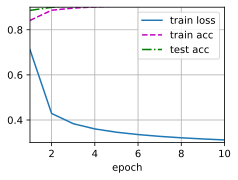

In [ ]:
num_epochs = 10
train_ch3(net, train_iter, test_iter, cross_entropy, num_epochs, updater)

##Torch Function

In [ ]:
from torch import nn

**Pytorch : nn**\
연산 그래프와 autograd는 복잡한 연산자를 정의하고 도함수(derivative)를 자동으로 계산
모듈은 입력 Variable을 받고 출력 Variable을 계산

In [ ]:
net = nn.Sequential(nn.Flatten(), nn.Linear(784, 10))
def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)
net.apply(init_weights);

In [ ]:
loss = nn.CrossEntropyLoss(reduction='none')

In [ ]:
trainer = torch.optim.SGD(net.parameters(), lr=0.1)

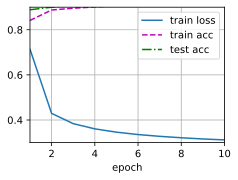

In [ ]:
num_epochs = 10
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)